In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load telemetry
df = pd.read_csv("/Users/ahmedmajid/Desktop/Digital-Twin-for Smart-Energy-Meters/digital-twin-mvp/data/meter.csv")

df.head()

,timestamp,temperature,vibration,pressure
0,2025-12-31 16:17:27.605538,58.95,1.03,106.15
1,2025-12-31 16:17:29.605538,46.33,0.67,91.05
2,2025-12-31 16:17:31.605538,47.32,0.66,108.21
3,2025-12-31 16:17:33.605538,51.99,0.53,108.83
4,2025-12-31 16:17:35.605538,52.29,0.92,107.46


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6000 non-null   datetime64[ns]
 1   temperature  6000 non-null   float64       
 2   vibration    6000 non-null   float64       
 3   pressure     6000 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 187.6 KB


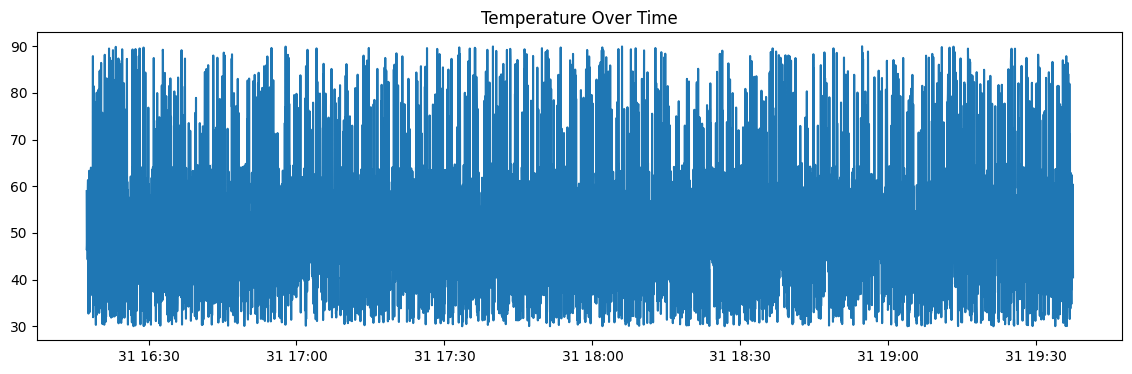

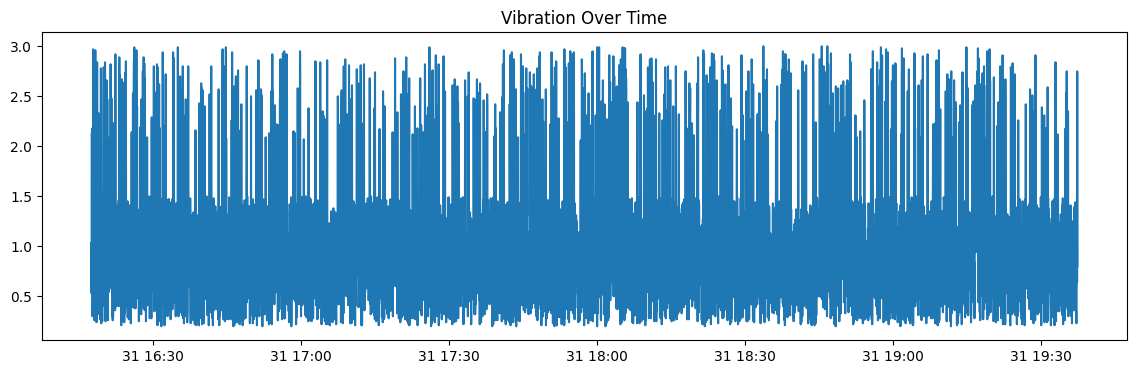

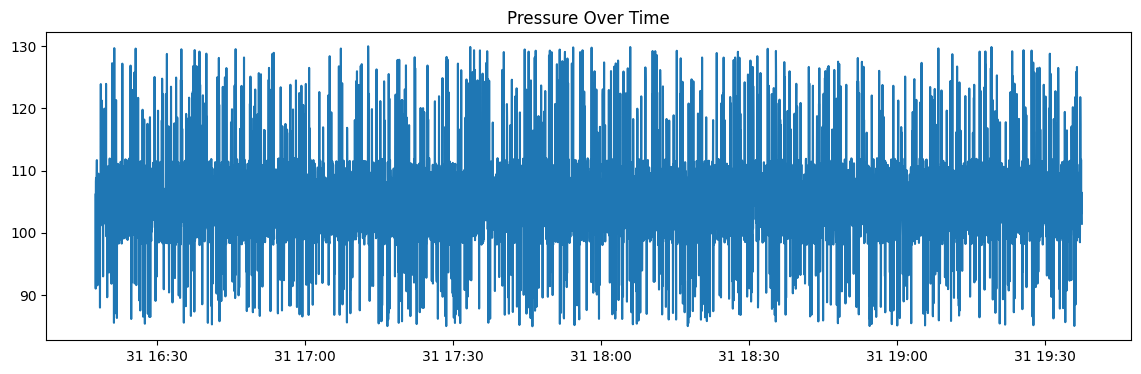

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['temperature'])
plt.title("Temperature Over Time")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['vibration'])
plt.title("Vibration Over Time")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['pressure'])
plt.title("Pressure Over Time")
plt.show()

In [10]:
df['anomaly_overheat'] = df['temperature'] > 70
df['anomaly_vibration'] = df['vibration'] > 2.0
df['anomaly_pressure_low'] = df['pressure'] < 95
df['anomaly_pressure_high'] = df['pressure'] > 115

In [11]:
df['anomaly'] = (
    df['anomaly_overheat'] |
    df['anomaly_vibration'] |
    df['anomaly_pressure_low'] |
    df['anomaly_pressure_high']
).astype(int)

df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly
0,2025-12-31 16:17:27.605538,58.95,1.03,106.15,False,False,False,False,0
1,2025-12-31 16:17:29.605538,46.33,0.67,91.05,False,False,True,False,1
2,2025-12-31 16:17:31.605538,47.32,0.66,108.21,False,False,False,False,0
3,2025-12-31 16:17:33.605538,51.99,0.53,108.83,False,False,False,False,0
4,2025-12-31 16:17:35.605538,52.29,0.92,107.46,False,False,False,False,0


In [12]:
df['temp_roll_mean'] = df['temperature'].rolling(window=5).mean()
df['temp_roll_std'] = df['temperature'].rolling(window=5).std()

df['vib_roll_mean'] = df['vibration'].rolling(window=5).mean()
df['vib_roll_std'] = df['vibration'].rolling(window=5).std()

df['pres_roll_mean'] = df['pressure'].rolling(window=5).mean()
df['pres_roll_std'] = df['pressure'].rolling(window=5).std()

df = df.fillna(method='bfill')

/var/folders/mx/y44hqtkj3494xz8wqskskb1r0000gn/T/ipykernel_12292/4204173582.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [13]:
df.to_csv("processed_telemetry.csv", index=False)
df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,2025-12-31 16:17:27.605538,58.95,1.03,106.15,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
1,2025-12-31 16:17:29.605538,46.33,0.67,91.05,False,False,True,False,1,51.376,5.012263,0.762,0.20584,104.34,7.496192
2,2025-12-31 16:17:31.605538,47.32,0.66,108.21,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
3,2025-12-31 16:17:33.605538,51.99,0.53,108.83,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
4,2025-12-31 16:17:35.605538,52.29,0.92,107.46,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
